<a href="https://colab.research.google.com/github/mzucali/pyStereoRose/blob/main/RoseDiagram_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

python IMPORT STATEMENTs

RUN the box

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Function definition

RUN it

**SET** VARIABLES


1.   upload your .xlsx file
2.   set the headers here (e.g., **DIR** for azimuthal values, **LEN** for weight factor, **mode** for data type)
3. data type must be **directions** (bi-directional data) or **axes** (mono-directional data)
4. example file is here: https://www.dropbox.com/scl/fi/odpv1fg18er3ujys99u0y/Rose_input_test.xlsx?rlkey=4un4kbk01d4ais4t8cos69sc8&dl=0
5. change file_path = '' variable with your actual file name


then **RUN**





In [3]:
indicator_mapping = {
    'groove': 'directions',
    'lineation': 'directions',
    'flute': 'axes',
    'ripple': 'axes',
    'cross lamination': 'axes',
    'trough stratification': 'axes',
    'imbrication': 'axes',
    'dune': 'axes'
}

In [4]:
# Read the Excel file
file_path0 = '/content/Rose_input_test.xlsx'  # Replace with your file path
df = pd.read_excel(file_path0)

# Create the 'mode' column based on the mapping
df['mode'] = df['paleocurrent_indicator'].str.lower().map(indicator_mapping)
#df['mode'] = df['mode'].astype(str)
# Save the modified dataframe back to Excel
df.to_excel("Rose_input_test_updated_file.xlsx", index=False)

# Display the first few rows
print(df.head())
print()

print()
print(type(df['mode'].items))

       DIR      LEN  DIP paleocurrent_indicator  mode
0   38.080  58.4975   23                  Flute  axes
1  160.120  33.5565   34                  Flute  axes
2  141.708  34.6985   12                  Flute  axes
3  168.931  28.4855   78                  Flute  axes
4   32.530  29.2130   56                 Ripple  axes


<class 'method'>


In [5]:

# Function to load and separate data based on the 'type' column
def load_and_separate_data(df, direction_column, weight_column, type_column, use_weight):
#def load_and_separate_data(file_path, direction_column, weight_column, use_weight):
    df = df
#    df = pd.read_excel(file_path)
    separated_data = {'axes': ([], []), 'directions': ([], [])}

    for _, row in df.iterrows():
        data_type = row[type_column].strip().lower()
        if data_type not in ['axes', 'directions']:
            continue  # Skip invalid entries

        direction = row[direction_column]
        if pd.isna(direction):
            continue  # Skip missing values

        weight = row[weight_column] if use_weight == 'yes' and not pd.isna(row[weight_column]) else 1

        if data_type == 'directions':
            # Convert axes to bi-directional (0-180° mirrored to 180-360°)
            direction1 = direction % 180  # Normalize to [0,180)
            direction2 = (direction1 + 180) % 360  # Mirror at 180°
            separated_data[data_type][0].extend([direction1, direction2])
            separated_data[data_type][1].extend([weight, weight])
        else:
            separated_data[data_type][0].append(direction % 360)  # Ensure within 0-360
            separated_data[data_type][1].append(weight)

    return separated_data


In [6]:
# Ask the user for input
#file_path = input("Enter the file path: ")
file_path2 = '/content/input_test.xlsx'
#sheet_name = input("Enter the sheet name: ")
#direction_column = input("Enter the direction column name: ")
direction_column = 'DIR'

#weight_column = input("Enter the weight column name: ")
weight_column = 'LEN'

#type_column = input("Enter the type column name: ")
type_column = 'mode'

#use_weight = input("Do you want to use the weight column? (yes/no): ").strip().lower()
use_weight = 'no'

In [7]:
# Load and separate data
separated_data = load_and_separate_data(df, direction_column, weight_column, type_column, use_weight)
#separated_data = load_and_separate_data(file_path, direction_column, weight_column, use_weight)

check data with this output for **axes** type data

In [8]:
print(separated_data['axes'])

([38.08, 160.12, 141.708, 168.931, 32.53, 114.281, 46.979, 75.528, 79.239, 131.688, 90.0, 62.404, 54.8, 127.328, 127.515, 171.65, 83.565, 111.189, 97.47, 118.257, 88.993, 112.032, 13.704, 90.0, 164.303, 88.355, 90.0, 79.324, 78.053, 145.018, 94.017, 10.7, 155.224, 3.971, 28.185, 159.59, 28.306, 101.959, 110.108, 103.903, 171.703, 155.682, 79.078, 17.752, 111.788, 81.218, 101.606, 16.533, 117.883, 80.146, 135.85, 47.517, 59.895, 111.7, 27.418, 9.642, 113.671, 104.166, 136.019, 104.317, 115.278, 56.647, 90.0, 117.362, 90.0, 106.67, 128.81, 159.952, 165.729, 138.719, 150.505, 144.482, 145.733, 99.968, 97.058, 93.609, 131.443, 99.109, 98.724, 119.471, 77.339, 108.057, 119.896, 114.8, 96.09, 117.666, 119.896, 98.731, 115.287, 64.913, 99.589, 107.741, 100.968, 95.713, 121.762], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

check data with this output for **direction** type data

In [9]:
print(separated_data['directions'])

([103.868, 283.868, 122.843, 302.843, 173.203, 353.203, 92.299, 272.299, 108.037, 288.03700000000003, 106.472, 286.472, 122.578, 302.578, 85.869, 265.869, 51.395, 231.395, 84.139, 264.139, 131.435, 311.435, 142.003, 322.003, 44.049, 224.049, 15.75, 195.75, 45.99, 225.99, 83.401, 263.401, 35.117, 215.117, 130.617, 310.61699999999996, 11.033, 191.033, 121.392, 301.392, 164.209, 344.209, 9.488, 189.488, 133.739, 313.73900000000003, 12.938, 192.938, 161.565, 341.565, 46.208, 226.208, 126.361, 306.361, 17.638, 197.638, 43.061, 223.061, 170.92, 350.91999999999996, 135.849, 315.849, 68.363, 248.363, 96.208, 276.20799999999997, 85.516, 265.516, 85.327, 265.327, 70.291, 250.291, 76.514, 256.514, 110.95, 290.95, 106.057, 286.057, 75.952, 255.952, 100.656, 280.656, 53.981, 233.981, 119.693, 299.693, 120.596, 300.596, 118.277, 298.277, 124.156, 304.156, 120.568, 300.568, 116.005, 296.005, 115.951, 295.951, 136.843, 316.84299999999996, 141.444, 321.44399999999996, 130.591, 310.591, 99.396, 279.396,

RUN this code to get plot and save it as raster (png) and vector files (eps, pdf, svg)

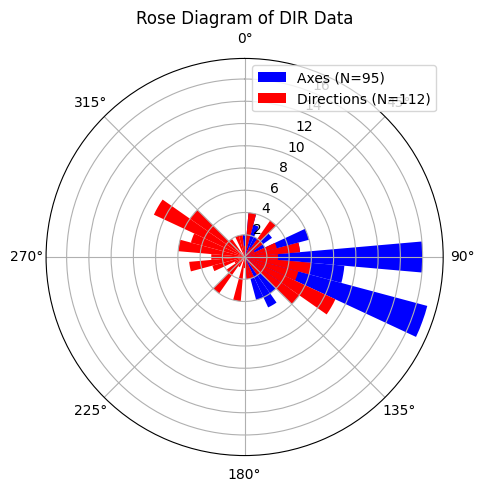

In [10]:
# Initialize figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.tight_layout()
colors = {'axes': 'blue', 'directions': 'red'}
labels = {
    'axes': f"Axes (N={len(separated_data['axes'][0])})",
    'directions': f"Directions (N={len(separated_data['directions'][0])})"
}

# Process and plot each type
theta_range = (0, 2 * np.pi)
num_bins = 36
for data_type, (direction_data, weights) in separated_data.items():
    if direction_data:
        direction_data_radians = np.radians(direction_data)
        counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=theta_range, weights=weights)
        ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color=colors[data_type], alpha=1, label=labels[data_type])

# Set plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_title(f"Rose Diagram of {direction_column} Data", pad=25)
if any(len(direction_data) > 0 for direction_data, _ in separated_data.values()):
    ax.legend()

# Show and save the plot
plt.show()
output_filename = "categorized_rose_diagram.png"
fig.savefig(output_filename)

# Save the plot in different vector formats
output_filename_svg = "categorized_rose_diagram.svg"
output_filename_pdf = "categorized_rose_diagram.pdf"
output_filename_eps = "categorized_rose_diagram.eps"

fig.savefig(output_filename_svg, format="svg")
fig.savefig(output_filename_pdf, format="pdf")
fig.savefig(output_filename_eps, format="eps")

plt.close("all")